In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from pylab import rcParams
rcParams['figure.figsize'] = 14,5

In [131]:
# Исходный датафрейм, показывающий статистику по качеству воды и смертности по городам.
df = pd.read_csv('water.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [132]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### Задание 1. Есть ли связь между жёсткостью воды и средней годовой смертностью?

#### 1) Построим точечный график.

<AxesSubplot:title={'center':'Correlation between mortality and water hardness'}, xlabel='mortality', ylabel='hardness'>

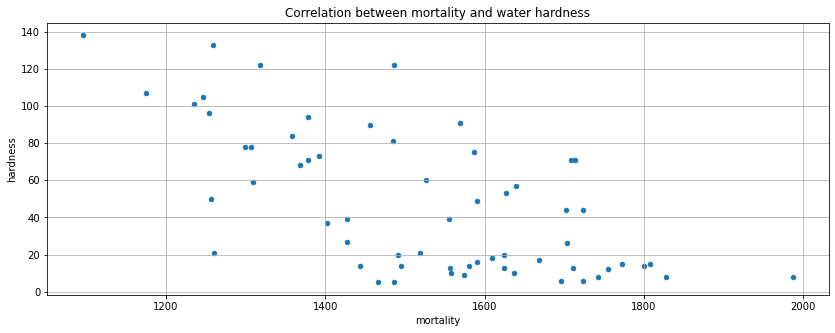

In [110]:
# точечный график
df.plot.scatter(x='mortality', y='hardness', grid=True, title='Correlation between mortality and water hardness')

Визуально есть обратная зависимость между смертностью и жесткостью воды. Суждение основано только на данных графика.

#### 2) Рассчитаем коэффициенты корреляции Пирсона и Спирмена.

In [22]:
# коэффициент корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [14]:
# коэффициент корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Оба коэффициента корреляции показывают близкие значения: -0.63, -0.65. Что говорит о довольно сильной статистической обратной зависимости.

#### 3) Построим модель линейной регрессии.

In [33]:
# модель линейной регрессии
x = df[['mortality']]
y = df['hardness']

# в задании нет задачи прогнозировать данные, 
# а качество модели будет оценено через коэффициент детерминации и анализ остатков,
# поэтому не вижу смысла разбивать данные на тестовые и тренировочные
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

a = '{:.2f}'.format(model.coef_[0])
b = '{:.2f}'.format(model.intercept_)
print('Уравнение регрессии:')
print(f'y = {a}*x + {b}')

Уравнение регрессии:
y = -0.13*x + 249.78


Text(0.5, 1.0, 'Regression')

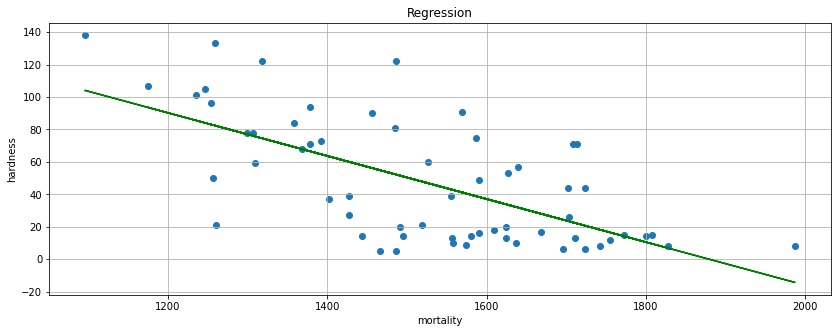

In [111]:
plt.scatter(x, y)
plt.plot(x, y_pred, c='green')
plt.grid(True)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Regression')

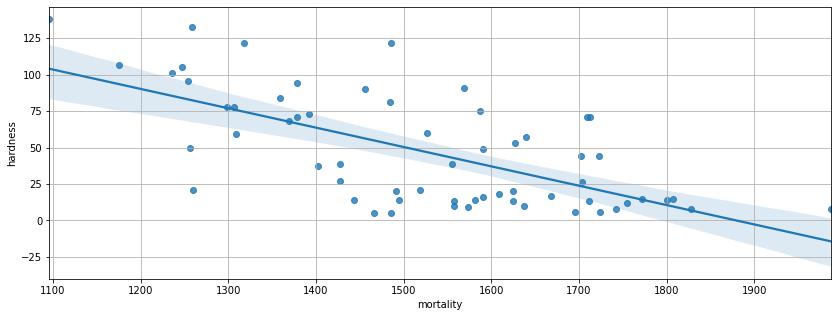

In [112]:
# другой способ: построим регрессию с помощью методов seaborn
sns.regplot(x='mortality', y='hardness', data=df)
plt.grid(True)

#### 4) Рассчитаем коэффициент детерминации.

In [44]:
# коэффициент детерминации
model.score(x, y)

0.4288267193124974

Коэффициент детерминации показывает не лучшее качество модели. В качестве дополнительного подтверждения проанализируем остатки.

#### 5) Построим график остатков.

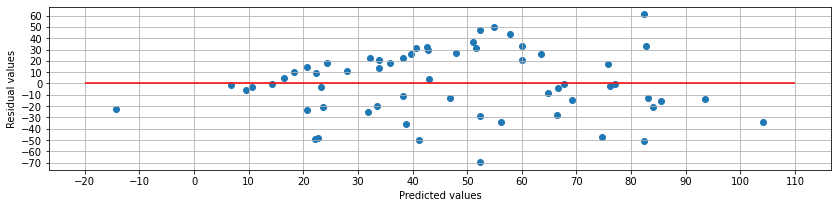

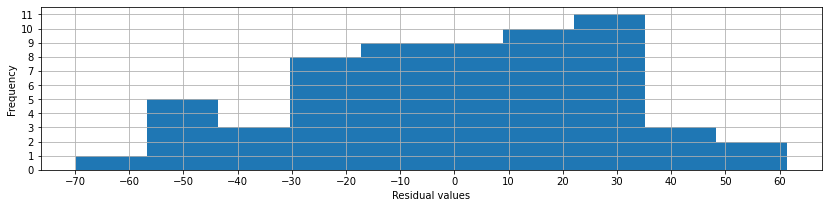

In [71]:
# график остатков
y_residuals = y_pred - y
plt.scatter(y_pred, y_residuals)
plt.grid(True)
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.xticks(ticks=range(-20, 120, 10))
plt.yticks(ticks=range(-80, 65, 10))
plt.hlines(y=0, xmin=-20, xmax=110, color='red')
plt.show()

# гистограмма распределения остатков
plt.hist(y_residuals)
plt.grid(True)
plt.xlabel('Residual values')
plt.ylabel('Frequency')
plt.xticks(ticks=range(-70, 65, 10))
plt.yticks(ticks=range(0, 12, 1))

rcParams['figure.figsize'] = 14,5

График остатков показывает, что положительные остатки в основом располагаются в промежутке от 0 до 55, для них также прослеживается некоторая тендения на возрастание. Отрицательные остатки распределены более хаотично.

В целом полученная корреляция между смертностью и жесткостью воды выглядит не слишком обоснованной. Действительно продолжительное потребление воды с всокой жесткостью может негативным образом влияет на сердечно-сосудистую систему, чревато возникновением заболеваний суставов (артритов, полиартритов), образованием камней в почках и желчных путях*.  Однако логика подсказывает, что на смертность влияет множесто разных факторов (например, вероятность возникновения заболеваний при потреблении воды с высокой жесткостью, демографический состав населения, социально-экономические показатели и т.д.). Также количество наблюдений (61) в датасете недостаточно, чтобы говорить о статистически значимой зависимости.


*Данные Роспотребнадзора (http://12.rospotrebnadzor.ru/rss_all/-/asset_publisher/Kq6J/content/id/282021#:~:text=%D0%9F%D1%80%D0%BE%D0%B4%D0%BE%D0%BB%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B6%D0%B5%D1%81%D1%82%D0%BA%D0%BE%D0%B9%20%D0%B2%D0%BE%D0%B4%D1%8B%20%D1%87%D1%80%D0%B5%D0%B2%D0%B0%D1%82%D0%BE,%D0%BF%D1%80%D0%B8%D0%BD%D0%BE%D1%81%D0%B8%D1%82%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BD%D0%B5%D0%BF%D1%80%D0%B8%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9%20%D0%B2%20%D0%B1%D1%8B%D1%82%D1%83.)

### Задание 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

#### 1) Разделим данные на 2 группы: юг и север.

In [128]:
# Юг.
south = df.loc[df.location=='South']
south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [129]:
# Север.
north = df.loc[df.location=='North']
north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


#### 2) Повторим аналогичные шаги из пункта 1 для каждой группы по отдельности.

##### Юг

<AxesSubplot:title={'center':'Correlation between mortality and water hardness for south'}, xlabel='mortality', ylabel='hardness'>

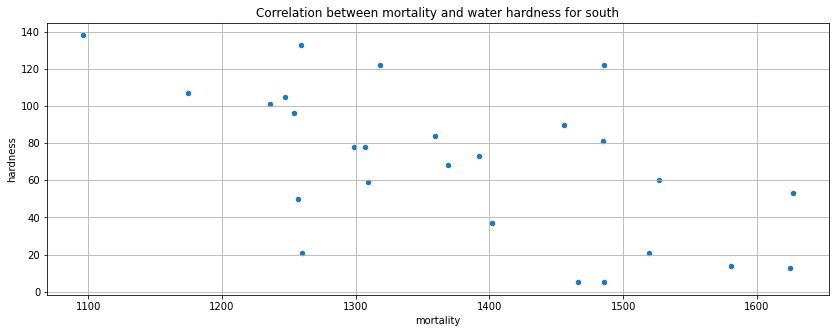

In [113]:
# точечный график
south.plot.scatter(x='mortality', y='hardness', grid=True, title='Correlation between mortality and water hardness for south')

In [86]:
# коэффициент корреляции Пирсона
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [87]:
# коэффициент корреляции Спирмена
south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Text(0.5, 1.0, 'Regression for south')

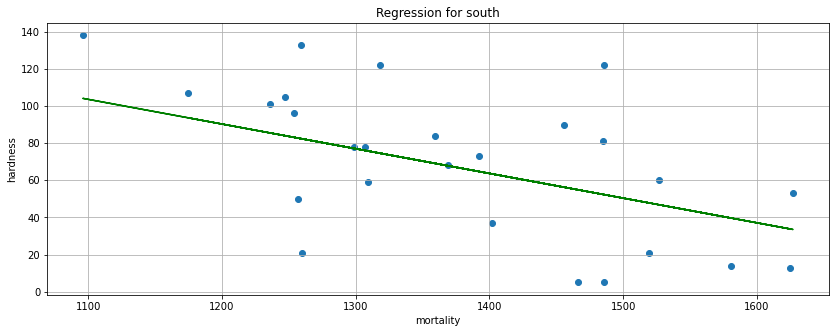

In [114]:
# модель линейной регрессии
x_s = south[['mortality']]
y_s = south['hardness']

model_s = LinearRegression()
model_s.fit(x_s, y_s)
y_pred_s = model.predict(x_s)

plt.scatter(x_s, y_s)
plt.plot(x_s, y_pred_s, c='green')
plt.grid(True)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Regression for south')

In [89]:
# коэффициент детерминации
model.score(x_s, y_s)

0.33717519575803157

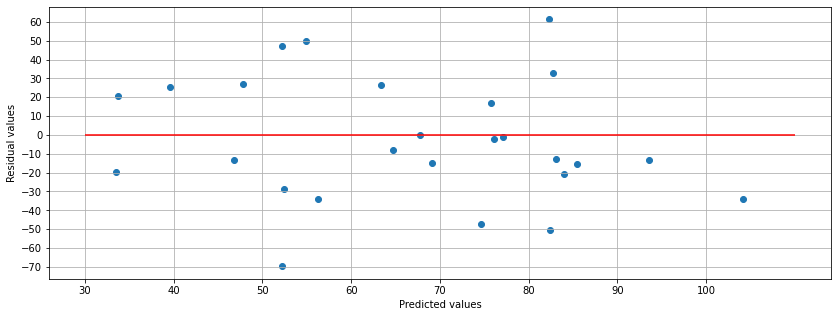

In [115]:
# график остатков
y_residuals_s = y_pred_s - y_s
plt.scatter(y_pred_s, y_residuals_s)
plt.grid(True)
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.xticks(ticks=range(0, 110, 10))
plt.yticks(ticks=range(-80, 65, 10))
plt.hlines(y=0, xmin=30, xmax=110, color='red')

На точечной диаграмме довольно сложно проследить четкую зависимость между смертностью и жесткостью воды в южных городах. Объем выборки не очень большой.

Коэффициент корреляции Пирсона и коэффициент корреляции Спирмена (оба ~60%) показывают довольно значительную обратную зависимость.

В то же время коэффициент детерминации говорит о невысоком качестве модели. 

График остатков хаотичный. Никаких закономерностей не прослеживается.

В целом выводы по южным городам совпадают с общими выводами:
 - небольшое количество данных (26),
 - за скобками остаются другие факторы, которые являются более значимыми в контексте смертности.

##### Север

<AxesSubplot:title={'center':'Correlation between mortality and water hardness for north'}, xlabel='mortality', ylabel='hardness'>

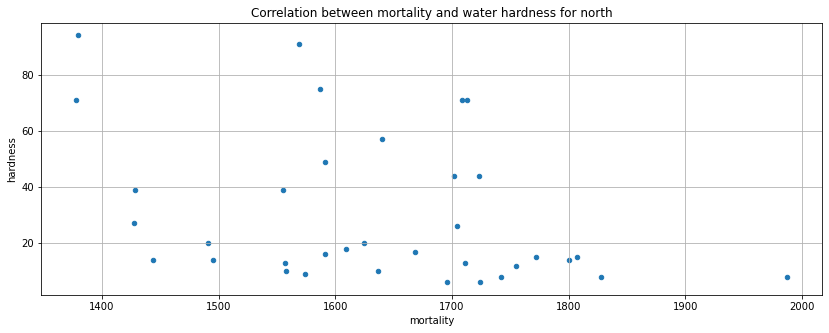

In [116]:
# точечный график
north.plot.scatter(x='mortality', y='hardness', grid=True, title='Correlation between mortality and water hardness for north')

In [117]:
# коэффициент корреляции Пирсона
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [118]:
# коэффициент корреляции Спирмена
north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


[-0.07034712]
145.31906222237836


Text(0.5, 1.0, 'Regression for north')

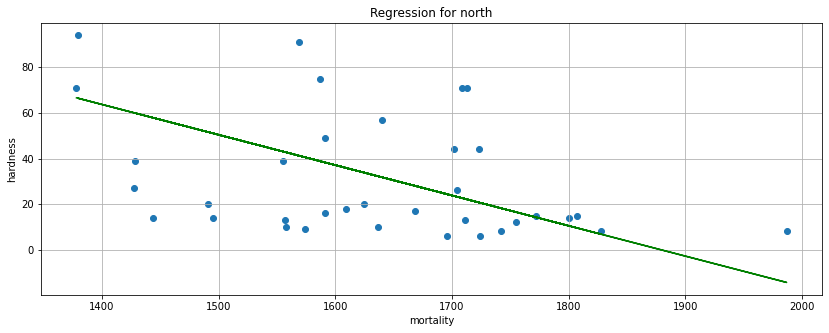

In [127]:
# модель линейной регрессии
x_n = north[['mortality']]
y_n = north['hardness']

model_n = LinearRegression()
model_n.fit(x_n, y_n)
y_pred_n = model.predict(x_n)

print(model_n.coef_)
print(model_n.intercept_)

plt.scatter(x_n, y_n)
plt.plot(x_n, y_pred_n, c='green')
plt.grid(True)
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.title('Regression for north')

In [120]:
# коэффициент детерминации
model.score(x_n, y_n)

0.020850105090798765

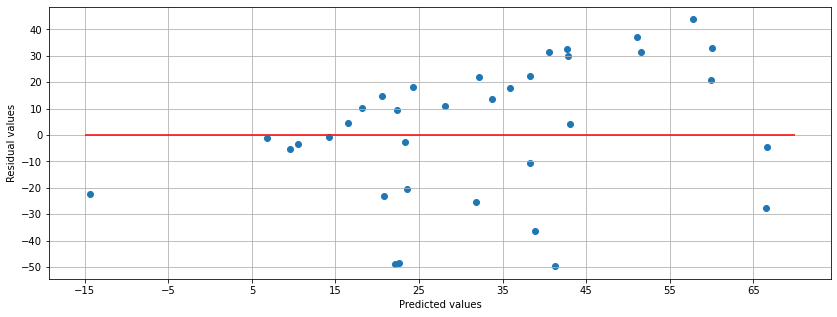

In [133]:
# график остатков
y_residuals_n = y_pred_n - y_n
plt.scatter(y_pred_n, y_residuals_n)
plt.grid(True)
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.xticks(ticks=range(-15, 70, 10))
plt.yticks(ticks=range(-80, 65, 10))
plt.hlines(y=0, xmin=-15, xmax=70, color='red')

Точечная диаграмма показывает, что связь между смертностью и жесткостью воды мало заметно. Что подтверждают невысокие коэффициенты корреляции (37-40%). На примере северных городов отчетливее видно, что на смертность влияют другие, не представленные в датасете, данные.

### Выводы:

Анализ был сделан на основе крайне маленькой выборки (61 наблюдение) и не показал значимой зависимости между смертностью и жесткостью воды, как по стране в целом, так и отдельно в южном и северном регионе.